# Input-output properties cells

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
CircuitPath = '/home/fernando/CA1_netpyne/info/data-bbp/20191017/'
BioName = CircuitPath + 'bioname/'
Atlas = CircuitPath + 'atlas/'
MorphologyPath = CircuitPath + 'morphologies/swc/'
CellLibraryFile = CircuitPath + 'sonata/nodes/nodes_hippocampus.h5'
METypePath = CircuitPath + 'emodels/20190402/hoc/'
MEComboInfoFile = CircuitPath + 'emodels/20190402/mecombo_emodel.tsv'
UserTargetFile = CircuitPath + 'user.target'
StartTargetFile = CircuitPath + 'start.target'

In [3]:
from bluepysnap import Circuit
from bluepysnap.bbp import Cell
circuit_path = CircuitPath + 'circuit_config.json'
circuit = Circuit(circuit_path)
cells = circuit.nodes["hippocampus_neurons"]

In [4]:
nodesinfo = cells.get()
nodesinfo

etype layer                            model_template   model_type  \
0       bAC   SLM   hoc:CA1_int_bAC_011127HP1_2019032911561  biophysical   
1       bAC   SLM   hoc:CA1_int_bAC_011127HP1_2019032911561  biophysical   
2       bAC   SLM   hoc:CA1_int_bAC_011127HP1_2019032911561  biophysical   
3       cAC    SR   hoc:CA1_int_cAC_990611HP2_2019032816214  biophysical   
4       cAC    SR   hoc:CA1_int_cAC_990611HP2_2019032816214  biophysical   
...     ...   ...                                       ...          ...   
18193  cNAC    SO    hoc:CA1_int_cNAC_970717D_2019030718251  biophysical   
18194  cNAC    SO    hoc:CA1_int_cNAC_970911C_2019030512040  biophysical   
18195  cNAC    SO    hoc:CA1_int_cNAC_970911C_2019030512040  biophysical   
18196  cNAC    SO  hoc:CA1_int_cNAC_990111HP2_2019032915570  biophysical   
18197  cNAC    SO  hoc:CA1_int_cNAC_970509HP2_2019030511562  biophysical   

      morph_class                                      morphology    mtype  \
0             INT          011127HP1_-_Scale_x1.000_y0.850_z1.000  SLM_PPA   
1             INT          011127HP1_-_Scale_x1.000_y0.850_z1.000  SLM_PPA   
2             INT          011127HP1_-_Scale_x1.000_y0.850_z1.000  SLM_PPA   
3             INT                                       990611HP2   SR_SCA   
4             INT          990611HP2_-_Scale_x1.000_y1.050_z1.000   SR_SCA   
...           ...                                             ...      ...   
18193         INT                                         980120A    SO_BP   
18194         INT            980120A_-_Scale_x1.000_y1.150_z1.000    SO_BP   
18195         INT  980120A_-_Scale_x1.000_y0.850_z1.000_-_Clone_0    SO_BP   
18196         INT            980120A_-_Scale_x1.000_y1.150_z1.000    SO_BP   
18197         INT            980120A_-_Scale_x1.000_y1.150_z1.000    SO_BP   

        region  rotation_angle_xaxis  rotation_angle_yaxis  \
0      mc5;SLM             -0.000000              0.306704   
1      mc3;SLM             -3.141593              1.051681   
2      mc6;SLM             -3.141593              1.393882   
3       mc5;SR             -3.141593              0.347655   
4       mc5;SR             -0.000000              0.137277   
...        ...                   ...                   ...   
18193   mc3;SO             -3.141593              1.303866   
18194   mc3;SO              0.000000             -1.070015   
18195   mc0;SO             -3.141593              1.267531   
18196   mc4;SO             -0.000000              0.815231   
18197   mc5;SO             -0.000000              0.121097   

       rotation_angle_zaxis synapse_class           x           y  \
0                 -0.000000           INH  409.446689  525.218483   
1                 -3.141593           INH  692.961402  511.187277   
2                 -3.141593           INH  624.142630  520.641475   
3                 -3.141593           INH  430.543380  411.999965   
4                 -0.000000           INH  427.936977  302.239247   
...                     ...           ...         ...         ...   
18193             -3.141593           INH  771.381002   37.274531   
18194              0.000000           INH  666.970306   58.551145   
18195             -3.141593           INH  505.811537  130.131875   
18196             -0.000000           INH  -68.542249   57.960736   
18197             -0.000000           INH  222.667008   90.924602   

                 z  @dynamics:holding_current  @dynamics:threshold_current  
0      1074.146619                   0.028962                     0.224609  
1       573.179832                   0.028962                     0.224609  
2       976.924721                   0.028962                     0.224609  
3      1180.185218                   0.005140                     0.341797  
4      1013.453517                   0.004947                     0.341797  
...            ...                        ...                          ...  
18193   231.992286                  -0.0116

In [5]:
most_central_10_SP_PC = [11617, 6393, 6789, 6243, 13513, 14311, 9397, 3699, 12245, 12001]
most_central_10_SP_PC = most_central_10_SP_PC - np.ones_like(most_central_10_SP_PC)

# SO_OLM_cells = [18039, 18040, 18041, 18042, 18043, 18044, 18045, 18046, 18047, 18048, 18049, 18050, 18051, 18052, 18053, 18054, 18055, 18056, 18057, 18058, 18059, 18060, 18061, 18062, 18063, 18064, 18065, 18066, 18067, 18068, 18069, 18070, 18071, 18072, 18073, 18074, 18075, 18076, 18077, 18078, 18079, 18080, 18081, 18082, 18083, 18084, 18085, 18086, 18087, 18088, 18089, 18090, 18091, 18092, 18093, 18094, 18095, 18096, 18097, 18098, 18099, 18100, 18101, 18102, 18103, 18104, 18105, 18106, 18107, 18108, 18109, 18110, 18111, 18112, 18113, 18114, 18115, 18116, 18117, 18118, 18119, 18120, 18121, 18122, 18123, 18124, 18125, 18126]
# SO_OLM_cells = SO_OLM_cells - np.ones_like(SO_OLM_cells)
# most_central_10_SP_PC = range(18198)

for gid in range(5):
    MorphoName = nodesinfo['morphology'][gid] + '.swc'
    hocName = METypePath + nodesinfo['model_template'][gid][4:] + '.hoc'
    cellName = nodesinfo['model_template'][gid][4:]  
    mcName = nodesinfo['region'][gid][:3]  
    layerName = nodesinfo['region'][gid][4:]  
    print('%s %s %s \n       %s' % (mcName,layerName,cellName,MorphoName))

mc5 SLM CA1_int_bAC_011127HP1_2019032911561 
       011127HP1_-_Scale_x1.000_y0.850_z1.000.swc
mc3 SLM CA1_int_bAC_011127HP1_2019032911561 
       011127HP1_-_Scale_x1.000_y0.850_z1.000.swc
mc6 SLM CA1_int_bAC_011127HP1_2019032911561 
       011127HP1_-_Scale_x1.000_y0.850_z1.000.swc
mc5 SR CA1_int_cAC_990611HP2_2019032816214 
       990611HP2.swc
mc5 SR CA1_int_cAC_990611HP2_2019032816214 
       990611HP2_-_Scale_x1.000_y1.050_z1.000.swc


In [6]:
print('hoclist size =',np.size(list(cells.property_values(Cell.MODEL_TEMPLATE))))
print('Morpholist size =',np.size(list(cells.property_values(Cell.MORPHOLOGY))))

hoclist size = 36
Morpholist size = 646


In [7]:
# Options
runPlot = 1

durationstim = 400.0
delaystim = 531.0
timesimulation = 1131.0
ampstim =  [-0.8, -0.6, -0.2, 0.2 ,0.4, 0.6 , 0.8, 1.0]

In [8]:
# !nrnivmodl mod/

In [9]:
from cellwrapper import loadCell
cell = loadCell(cellName, MorphoName)
soma = cell.soma[0]

In [10]:
gid

4

In [11]:
cell

CA1_int_cAC_990611HP2_2019032816214[0]

In [12]:
nodesinfo['mtype'][gid]

'SR_SCA'

In [13]:
stimulus = neuron.h.IClamp(0.5, sec=soma)
stimulus.dur = durationstim # ms
stimulus.delay = delaystim  # ms   
step_number=3
stimulus.amp = ampstim[step_number]

bmtkTraces = []
bmtkTracesList = []

recordings = {}

recordings['time'] = neuron.h.Vector()
recordings['soma(0.5)'] = neuron.h.Vector()

recordings['time'].record(neuron.h._ref_t, 0.1)
recordings['soma(0.5)'].record(cell.soma[0](0.5)._ref_v, 0.1)

Vector[5]

Changed dt
Soma voltage for step 3 saved to: soma_voltage_step3.dat


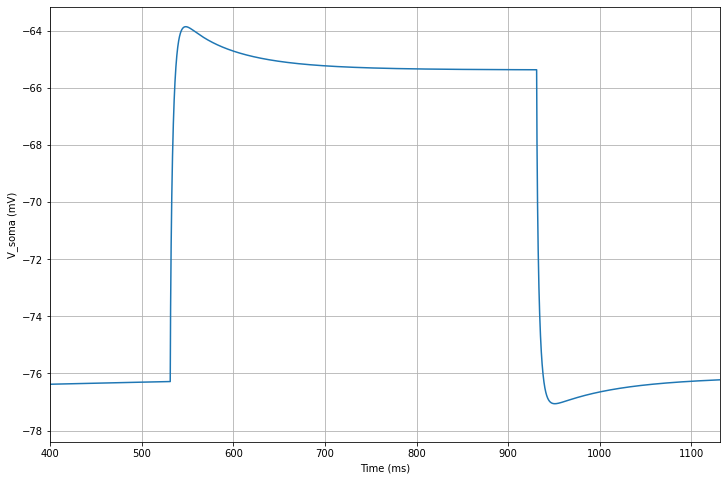

In [14]:
neuron.h.dt = 0.05
neuron.h.cvode_active(0)
neuron.h.tstop = timesimulation # ms
neuron.h.run();
        
time = np.array(recordings['time'])
soma_voltage = np.array(recordings['soma(0.5)'])

bmtkTraces.append(soma_voltage)
bmtkTracesList.append(list(soma_voltage))

soma_voltage_filename = os.path.join(
    'soma_voltage_step%d.dat' % (step_number))
np.savetxt(soma_voltage_filename, soma_voltage)

print('Soma voltage for step %d saved to: %s'
        % (step_number, soma_voltage_filename))

fig = plt.figure(figsize=(12,8))

plt.plot(time,soma_voltage)
plt.xlabel('Time (ms)')
plt.ylabel('V_soma (mV)')
plt.xlim(400,timesimulation)
plt.grid(True)

# fig.savefig('{s1}/{s}_BBP_changingT.png'.format(s1=outFolder,s=folder[cellnumber]))

In [15]:
parameters_name = {}

parameters_name[0] = 'synapse_id'
parameters_name[1] = 'pre_cell_id'
parameters_name[2] = 'pre_mtype'
parameters_name[3] = 'sectionlist_id'
parameters_name[4] = 'sectionlist_index'
parameters_name[5] = 'seg_x'
parameters_name[6] = 'synapse_type'
parameters_name[7] = 'dep'
parameters_name[8] = 'fac'
parameters_name[9] = 'use'
parameters_name[10] = 'tau_d'
parameters_name[11] = 'delay'
parameters_name[12] = 'weight'

parameters_syn = {}

hotspot_synapses = []
hotspot_netcons  = []
hotspot_netstims = [] 

pre_mtypes_excinh = [] 

for isynapse in range(10):

    parameters_syn[isynapse,'sectionlist_id'] = 0
    parameters_syn[isynapse,'sectionlist_index'] = 0
    parameters_syn[isynapse,'seg_x'] = 0.5
    
    #Create sectionref to the section the synapse will be placed on
    if parameters_syn[isynapse,'sectionlist_id'] == 0:
        cell.soma[parameters_syn[isynapse,'sectionlist_index']]      
    #             sectionlist_name = "somatic"    
    elif parameters_syn[isynapse,'sectionlist_id'] == 1:
        cell.dend[parameters_syn[isynapse,'sectionlist_index']] 
    #             sectionlist_name = "basal" 
    elif parameters_syn[isynapse,'sectionlist_id'] == 2:
        cell.apic[parameters_syn[isynapse,'sectionlist_index']]    
    #             sectionlist_name = "apical" 
    elif parameters_syn[isynapse,'sectionlist_id'] == 3:
        cell.axon[parameters_syn[isynapse,'sectionlist_index']]     
    #             sectionlist_name = "axonal"         
    else:
        print ("Sectionlist_id %d not support\n" % parameters_syn[isynapse,'sectionlist_index'])   
        
    hotspot_synapses.append(neuron.h.ProbAMPANMDA_EMS(soma(parameters_syn[isynapse,'seg_x'])))    
    hotspot_netstims.append(neuron.h.NetStim())
    hotspot_netcons.append(neuron.h.NetCon(hotspot_netstims[isynapse],hotspot_synapses[isynapse]))

    hotspot_netcons[isynapse].weight[0] = 1.72 # strength of the synapse
    hotspot_netcons[isynapse].delay = 0.5
    hotspot_netstims[isynapse].number   = 1000 # number of synaptic activation
    hotspot_netstims[isynapse].noise    = 1.0   # randomness
    hotspot_netstims[isynapse].interval = 20  # mean time between spikes |200 ms = 5 Hz|
    hotspot_netstims[isynapse].start = 20 + 20*isynapse

In [16]:
time = neuron.h.Vector()
voltage = neuron.h.Vector()
ik = neuron.h.Vector()

time.record(neuron.h._ref_t)
voltage.record(soma(.5)._ref_v);
ik.record(soma(.5)._ref_ik);

neuron.h.run()

def plot_tv(time_array, voltage_array, show=True, label=None, ylabel='Membrane voltage (mV)', xyaxis=[400, 4000, -85, 50] , constants=[]):
    import matplotlib.pyplot as plt
    import numpy
    plt.plot(time_array, voltage_array, label=label)
    for constant in constants:
        plt.plot(time_array, constant*numpy.ones(len(time_array)))
    plt.xlabel('Time (ms)')
    plt.ylabel(ylabel)
    plt.axis(xyaxis)
    if show:
        plt.show()

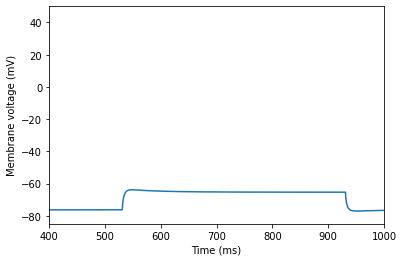

In [17]:
plot_tv(time, voltage, ylabel='Membrane voltage (mV)', xyaxis=[400, 1000, -85, 50])
# plot_tv(time, ik, ylabel='ik', xyaxis=[400, 1000, 0, 0.35])

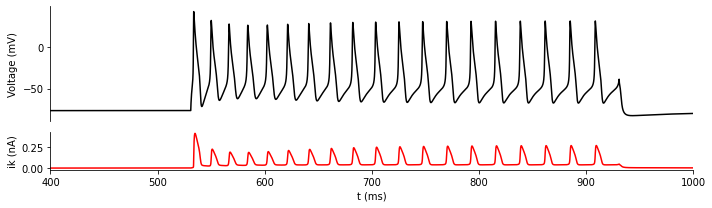

In [17]:
f, (ax0, ax1) = plt.subplots(2,1, figsize=(10,3), gridspec_kw = {'height_ratios':[3, 1]})
ax0.plot(time,voltage, 'k')
ax1.plot(time,ik, 'r')

ax0.set_ylabel('Voltage (mV)')
ax0.set_xlim(400,1000)
ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.spines['bottom'].set_visible(False)
ax0.get_xaxis().set_visible(False)


# ax1.plot([5,5],[0.25,0.75],'k')
# ax1.text(10,0.5,'500pA',va='center')
ax1.set_ylabel('ik (nA)')
ax1.set_xlabel('t (ms)')
ax1.set_xlim(400,1000)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(True)
ax1.get_yaxis().set_visible(True)
plt.tight_layout()

In [18]:
list(cell.soma[0](0.5))

[ca_ion,
 cacum,
 k_ion,
 kca,
 cagk,
 cat,
 cal,
 can,
 hd,
 kap,
 kmb,
 kdb,
 ttx_ion,
 na_ion,
 na3,
 kdrb,
 pas]

In [19]:
print(cell.soma[0].ena,cell.soma[0].ek)

50.0 -90.0


In [20]:
from neuron import h, gui2
gui2.set_backend('jupyter')
# h.load_file('/home/fernando/CA1_netpyne/info/data-bbp/20191017/morphologies/swc/' + MorphoName)  
ps = gui2.PlotShape()
ps.variable('v')
ps.show(0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
%%capture
!pip install NeuroM[plotly]
%matplotlib inline

# Import neurom module
import neurom as nm
# Import neurom visualization module
from neurom import viewer
from neurom.view import plotly

neuronM = nm.load_neuron(MorphologyPath + MorphoName)

# Visualize a morphology in two dimensions
# fig, ax = plotly.draw(neuron, plane='xy', inline=True)
# Visualize a morphology in three dimensions
# fig, ax = plotly.draw(neuron, inline=True)
# Visualize a single tree in three dimensions
# fig, ax = plotly.draw(neuron.neurites[0], inline=True)
# Visualize the dendrogram of a morphology
# fig, ax = viewer.draw(neuron, mode='dendrogram')

In [30]:
fig, ax = plotly.draw(neuronM.neurites[1:], inline=True)

In [23]:
# Extract the total number of neurites (basal and apical dendrites, and axons)
number_of_neurites = nm.get('number_of_neurites', neuronM)

# Extract the total number of sections
number_of_sections = nm.get('number_of_sections', neuronM)

# Extract the soma radius
soma_radius = neuronM.soma.radius

# Extract the number of sections per neurite
number_of_sections_per_neurite = nm.get('number_of_sections_per_neurite', neuronM)

# Print result
print("Neuron id          : {0} \n\
Number of neurites : {1} \n\
Soma radius        : {2:.2f} \n\
Number of sections : {3}".format(neuronM.name, number_of_neurites[0], soma_radius, number_of_sections[0]))
print()
print("Neurite type \t\t\t| Number of sections")
for i, neurite in enumerate(neuronM.neurites):    
    print("{0:31} | {1}".format(str(neurite.type), number_of_sections_per_neurite[i]))

Neuron id          : 990611HP2_-_Scale_x1.000_y1.050_z1.000 
Number of neurites : 5 
Soma radius        : 7.70 
Number of sections : 387

Neurite type 			| Number of sections
NeuriteType.axon                | 333
NeuriteType.basal_dendrite      | 9
NeuriteType.basal_dendrite      | 21
NeuriteType.basal_dendrite      | 21
NeuriteType.basal_dendrite      | 3


In [24]:
import efel

bmtkTraces = []
bmtkTracesList = []

durationstim = 400.0
delaystim = 531.0
timesimulation = 1131.0

step1_current = 0.1

current = 0.1
for c in range(10):
    
    recordings = {}

    recordings['time'] = neuron.h.Vector()
    recordings['soma(0.5)'] = neuron.h.Vector()

    recordings['time'].record(neuron.h._ref_t, 0.1)
    recordings['soma(0.5)'].record(cell.soma[0](0.5)._ref_v, 0.1)

    stimulus.amp = current
    
    current = current + step1_current
    neuron.h.run();

    time = np.array(recordings['time'])
    soma_voltage = np.array(recordings['soma(0.5)'])

    bmtkTraces.append(soma_voltage)
    bmtkTracesList.append(list(soma_voltage))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
traces = []
for c in range(10):
    bmtkTrace = bmtkTraces[c]
    trace = {}
    trace['T'] = time
    trace['V'] = bmtkTrace
    trace['stim_start'] = [delaystim]
    trace['stim_end'] = [delaystim+durationstim]
    traces.append(trace)

In [26]:
trace

{'T': array([0.0000e+00, 1.0000e-01, 2.0000e-01, ..., 1.1308e+03, 1.1309e+03,
        1.1310e+03]),
 'V': array([-65.        , -65.62915875, -66.14915263, ..., -77.81963704,
        -77.81890011, -77.81816369]),
 'stim_start': [531.0],
 'stim_end': [931.0]}

In [34]:
feature_values = efel.getFeatureValues(traces[3:], ['mean_frequency', 'time_to_first_spike', 'peak_time'])

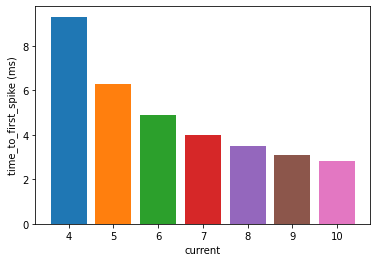

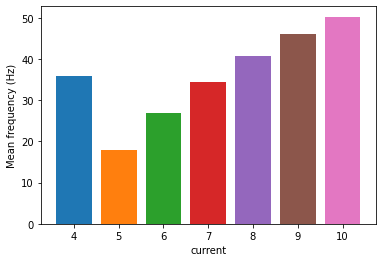

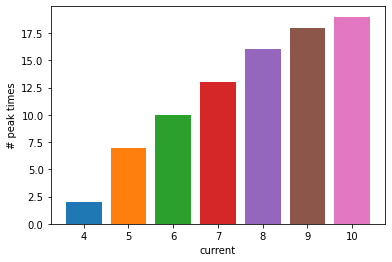

In [39]:
import pylab
current = step1_current/1.2 + 4*step1_current/12.0
for step_number in range(10-3):
    pylab.bar(step_number, feature_values[step_number]['time_to_first_spike'][0], align='center')
pylab.ylabel('time_to_first_spike (ms)')
pylab.xlabel('current')
pylab.xticks(range(7), range(4,11))
pylab.show()

for step_number in range(10-3):
    pylab.bar(step_number, feature_values[step_number]['mean_frequency'][0], align='center')
pylab.ylabel('Mean frequency (Hz)')
pylab.xlabel('current')
pylab.xticks(range(7), range(4,11))
pylab.show()

for step_number in range(10-3):
    pylab.bar(step_number, np.size(feature_values[step_number]['peak_time']), align='center')
pylab.ylabel('# peak times')
pylab.xlabel('current')
pylab.xticks(range(7), range(4,11))
pylab.show()

# feature_values

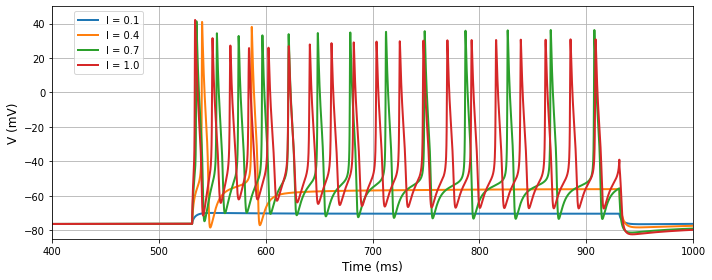

In [45]:
# plot both traces overlayed
fontsiz=12
timeRange = [0, timesimulation]
# ~ ylim = [-100, 40]
figSize = (10,4)
fig = plt.figure(figsize=figSize)  # Open a new figure

for c in range(0,10,3):
    BBPTrace2 = bmtkTraces[c]
#     plt.subplot(10, 1, c+1)
    plt.plot(time[:len(BBPTrace2)], BBPTrace2, linewidth=2.0, label='I = %.1f'%(float(0.1*c+0.1)))  # linestyle=':'
    plt.ylabel('V (mV)', fontsize=fontsiz)
    plt.ylim(-85,50)
    plt.grid(True)
    plt.xlim(400,1000)
    plt.legend(loc='upper right', bbox_to_anchor=(0.15, 1.0))
plt.xlabel('Time (ms)', fontsize=fontsiz)
plt.ion()
plt.tight_layout()
# ~ plt.savefig(outFolder+'/comparison_traces_soma_voltage_4steps_%s.png' % cellName)
# ~ print ("Figure Saved in %s/comparison_traces_soma_voltage_4steps_%s.png" % (outFolder,cellName))
# plt.savefig(rootFolder+'Figures-comparation/comparison_traces_soma_voltage_4steps_%s.png' % cellName)

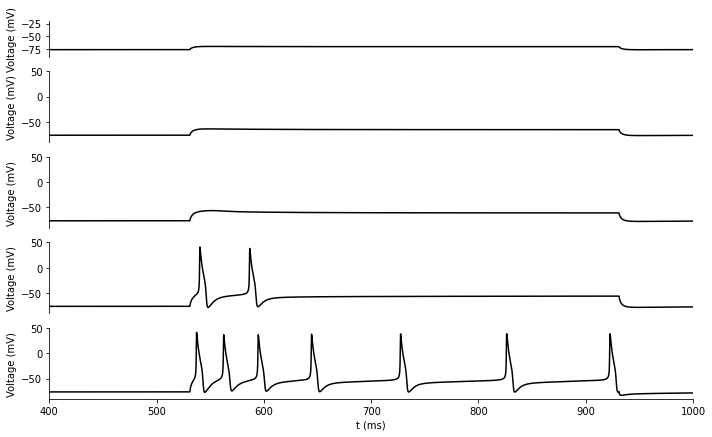

In [43]:
f, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(5,1, figsize=(10,6), gridspec_kw = {'height_ratios':[1, 2, 2, 2, 2]})

ax0.plot(time,bmtkTraces[0], 'k')
ax0.set_ylabel('Voltage (mV)')
ax0.set_xlim(400,1000)
ax0.set_ylim(-90,-20)
ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.spines['bottom'].set_visible(False)
ax0.get_xaxis().set_visible(False)

ax1.plot(time,bmtkTraces[1], 'k')
ax1.set_ylabel('Voltage (mV)')
ax1.set_xlim(400,1000)
ax1.set_ylim(-90,50)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.get_xaxis().set_visible(False)

ax2.plot(time,bmtkTraces[2], 'k')
ax2.set_ylabel('Voltage (mV)')
ax2.set_xlim(400,1000)
ax2.set_ylim(-90,50)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.get_xaxis().set_visible(False)

ax3.plot(time,bmtkTraces[3], 'k')
ax3.set_ylabel('Voltage (mV)')
ax3.set_xlim(400,1000)
ax3.set_ylim(-90,50)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.get_xaxis().set_visible(False)

# ax1.plot([5,5],[0.25,0.75],'k')
# ax1.text(10,0.5,'500pA',va='center')
ax4.plot(time,bmtkTraces[4], 'k')
ax4.set_ylabel('Voltage (mV)')
ax4.set_xlabel('t (ms)')
ax4.set_xlim(400,1000)
ax4.set_ylim(-90,50)
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.spines['left'].set_visible(True)
ax4.get_yaxis().set_visible(True)

plt.tight_layout()

## Synapses

In [13]:
parameters_name = {}

parameters_name[0] = 'synapse_id'
parameters_name[1] = 'pre_cell_id'
parameters_name[2] = 'pre_mtype'
parameters_name[3] = 'sectionlist_id'
parameters_name[4] = 'sectionlist_index'
parameters_name[5] = 'seg_x'
parameters_name[6] = 'synapse_type'
parameters_name[7] = 'dep'
parameters_name[8] = 'fac'
parameters_name[9] = 'use'
parameters_name[10] = 'tau_d'
parameters_name[11] = 'delay'
parameters_name[12] = 'weight'

In [14]:
parameters_syn = {}

hotspot_synapses = []
hotspot_netcons  = []
hotspot_netstims = [] 

pre_mtypes_excinh = [] 